### Test signal welch function with real vs. complex inputs


In [2]:
import os
import numpy as np
import sys; sys.path.insert(0, '..') # add parent folder path where lib folder is
from loading_functions import *
from scipy import signal

In [3]:
# DroneDetect
main_folder = '/home/ltindall/data/DroneDetect/DroneDetect_V2/' # data path on mp-gpu-desktop06
sub_folders = os.listdir(main_folder)
fs = 60e6 #60 MHz

In [4]:
# loop through all files
# for sf in ['WIFI']: #, 'BLUE', 'BOTH', 'CLEAN']: # options: ['WIFI', 'BLUE', 'BOTH', 'CLEAN']
#     print('current folder: ', sf)

#     drone_folders = os.listdir(main_folder+sf+'/')
#     for df in drone_folders:
# #         print('     subfolder:', df)
#         # reset lists -  to save memory
#         DRONES = []
#         CONDS =[]
#         INTS = [] # interferences: 00 for a clean signal, 01 for Bluetooth only, 10 for Wi-Fi only and 11 for Bluetooth and Wi-Fi interference concurrently.

#         # features
#         F_PSD = []
#         F_PSD_freq = []

#         F_SPEC = []
#         F_SPEC_freq = []
#         F_SPEC_time = []

#         files = os.listdir(main_folder+sf+'/'+df+'/')
        

In [5]:
## Pick file to load
sf = 'CLEAN'
df = 'DIS_ON'
files = os.listdir(main_folder+sf+'/'+df+'/')

In [6]:
files

['DIS_0000_00.dat',
 'DIS_0000_04.dat',
 'DIS_0000_03.dat',
 'DIS_0000_01.dat',
 'DIS_0000_02.dat']

In [11]:
fi = files[0] # just for one file
d_single, _ = load_dronedetect_raw(main_folder+sf+'/'+df+'/'+fi, t_seg)

In [9]:
for fi in files:
    t_seg = 20
    d_split, _ = load_dronedetect_raw(main_folder+sf+'/'+df+'/'+fi, t_seg)
    print(len(d_split))
    try:
        d_split_all = np.vstack((d_split_all, d_split))
    except:
        d_split_all = d_split

100
100
100
100
100


In [10]:
d_split_all.shape

(500, 1200000)

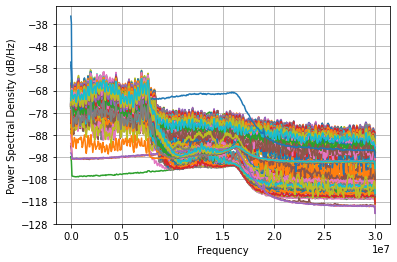

In [17]:
Psds = []
for i_plot in range(500):
#     fpsd, Pxx_den = signal.welch(d_split[i_plot], fs, window='hann', nperseg=1024, noverlap=120)
    Pxx_den, fpsd = plt.psd(d_split_all[i_plot],Fs=fs, noverlap=120, NFFT=1024, sides='onesided')
    Psds.append(Pxx_den)

In [18]:
mean_psd = np.mean(np.array(Psds), axis=0)

Text(0.5, 1.0, 'Using Complex Inputs')

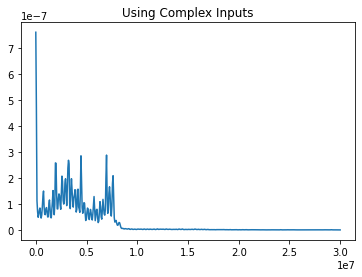

In [19]:
plt.plot(fpsd, mean_psd)
plt.title('Using Complex Inputs')

## Test Spectrogram & match paper

In [102]:
## Pick file to load
sf = 'CLEAN'
df = 'PHA_HO'
files = os.listdir(main_folder+sf+'/'+df+'/')

fi_number = 2
t_seg = 20

fi = files[fi_number] # just for one file
d_single, _ = load_dronedetect_raw(main_folder+sf+'/'+df+'/'+fi, t_seg)

segment_number = 10
d_complex = d_single[segment_number]

In [103]:
n_per_seg = 1024
noverlap = 120
win_type = 'hann'
fspec, t, Sxx = signal.spectrogram(d_complex.real, fs, window=win_type, nperseg=n_per_seg, noverlap =noverlap) ## using minimal overlap
# F_SPEC.append(Sxx)
# F_SPEC_freq.append(fspec)
# F_SPEC_time.append(t)

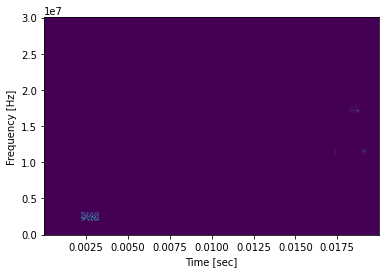

In [106]:
from scipy.fft import fftshift
# plt.pcolormesh(t, fftshift(fspec), fftshift(Sxx, axes=0), shading='gouraud')
plt.pcolormesh(t, fspec, Sxx, vmin=Sxx.min(), vmax=Sxx.max())
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [101]:
fspec.min()

0.0

### Visualize signal and understand relevance

In [16]:
len(d_single)
d_test = d_single[10]

In [15]:
from scipy.fft import fft

In [25]:
yi = fft(d_test.imag)
yr = fft(d_test.real)
y = fft(d_test)

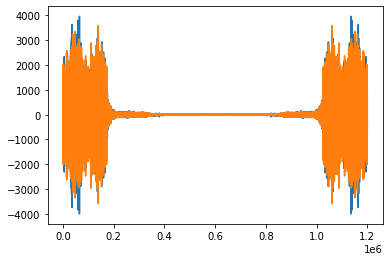

In [24]:
plt.plot(yr)
plt.plot(yi)

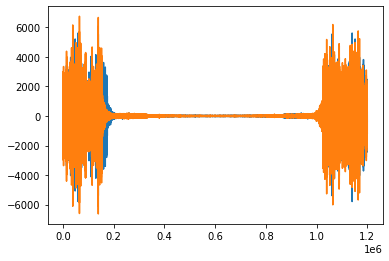

In [27]:
plt.plot(yi+yr)
plt.plot(y)

In [28]:
st = np.multiply(y, np.conj(y))

In [48]:
(len(st)-1)*fs/len(st)

59999950.0

In [58]:
freqs = range(0, int((len(st))*fs/len(st)), int(fs/len(st)))

In [59]:
len(freqs)

1200000

In [62]:
freqs[0]

0

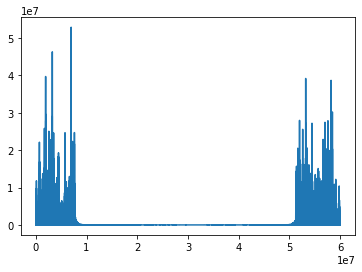

In [60]:
# plt.plot(abs(st))
plt.plot(freqs, st)
# magnitude is almost the same as st

In [31]:
ywelch = signal.welch(d_test, 're')

/home/kzhou/.pyenv/versions/3.8.2/envs/main/lib/python3.8/site-packages/scipy/signal/_spectral_py.py:1814: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


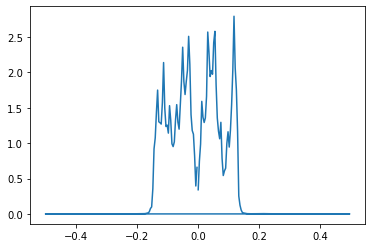

In [37]:
plt.plot(ywelch[0], ywelch[1])

In [35]:
ywelch[0]

array([ 0.        ,  0.00390625,  0.0078125 ,  0.01171875,  0.015625  ,
        0.01953125,  0.0234375 ,  0.02734375,  0.03125   ,  0.03515625,
        0.0390625 ,  0.04296875,  0.046875  ,  0.05078125,  0.0546875 ,
        0.05859375,  0.0625    ,  0.06640625,  0.0703125 ,  0.07421875,
        0.078125  ,  0.08203125,  0.0859375 ,  0.08984375,  0.09375   ,
        0.09765625,  0.1015625 ,  0.10546875,  0.109375  ,  0.11328125,
        0.1171875 ,  0.12109375,  0.125     ,  0.12890625,  0.1328125 ,
        0.13671875,  0.140625  ,  0.14453125,  0.1484375 ,  0.15234375,
        0.15625   ,  0.16015625,  0.1640625 ,  0.16796875,  0.171875  ,
        0.17578125,  0.1796875 ,  0.18359375,  0.1875    ,  0.19140625,
        0.1953125 ,  0.19921875,  0.203125  ,  0.20703125,  0.2109375 ,
        0.21484375,  0.21875   ,  0.22265625,  0.2265625 ,  0.23046875,
        0.234375  ,  0.23828125,  0.2421875 ,  0.24609375,  0.25      ,
        0.25390625,  0.2578125 ,  0.26171875,  0.265625  ,  0.26

In [38]:
y

array([-802.2793  -848.1885j ,  116.780785-638.05554j,
        725.607   -666.4011j , ...,  656.577   +311.2844j ,
        753.70557 -246.57982j, -538.959   +282.67792j], dtype=complex64)

### signal exploration

In [70]:
# import math

In [71]:
# create some test wave
fq = 100 # Hz
Ts = 1/fq
t = np.arange(0,100, Ts)

x1 = np.sin(2*math.pi*t)
x2 = np.sin(3*math.pi*t)

x_all = x1+x2

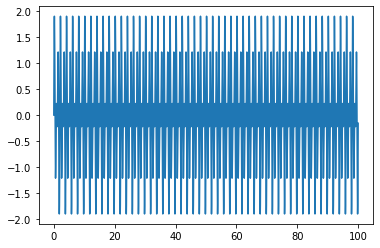

In [72]:
plt.plot(t, x_all)

In [73]:
y = fft(x_all)

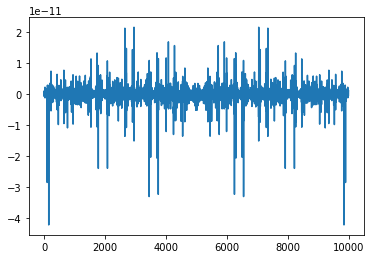

In [74]:
plt.plot(y)